# Introduction to Finance - Assignment 3

In [10]:
#Preparations 

import jax.numpy as jnp

R̄ = jnp.array([1.06, 1.09])
V = jnp.array([[0.1, 0.05], 
               [0.05, 0.15]])
One = jnp.ones(len(R̄))

In [11]:
#Parameters

V_inversed = jnp.linalg.inv(V)
α = One.T @ V_inversed @ R̄ 
ς = R̄.T  @ V_inversed @ R̄ 
σ = One.T @ V_inversed @ One

Question 1: 
What is the standard deviation of the minimum variance portfolio?
State your answer to 4 decimal places, e.g., 0.2532.
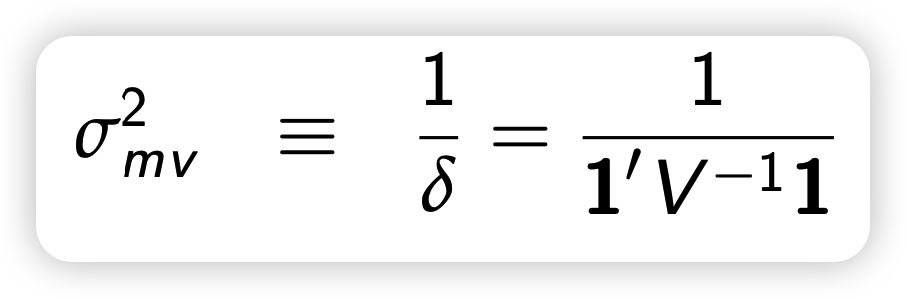

In [12]:
def σ_mv():
    return (1/σ)**0.5
print(σ_mv())


0.28867513


Question 2: What is the expected return on the minimum variance portfolio? State your answer to 4 decimal places, e.g., 1.0745.
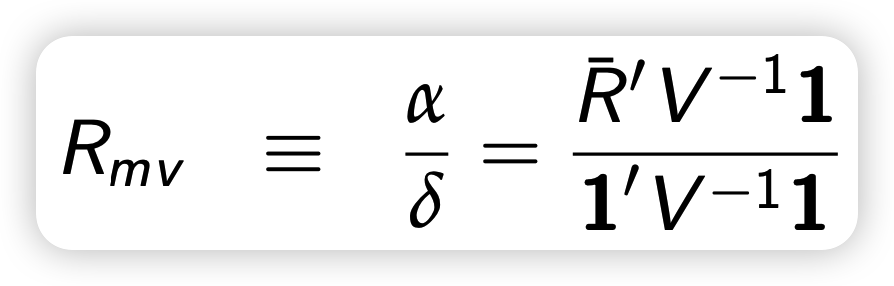

In [13]:
def R_mv():
    return α/σ
print(R_mv())

1.07


Question 3: Based on your answer in question 2, what must be the minimum variance portfolio’s proportion invested in asset 1, ω1? State your answer to 4 decimal places, e.g., 0.4221. 
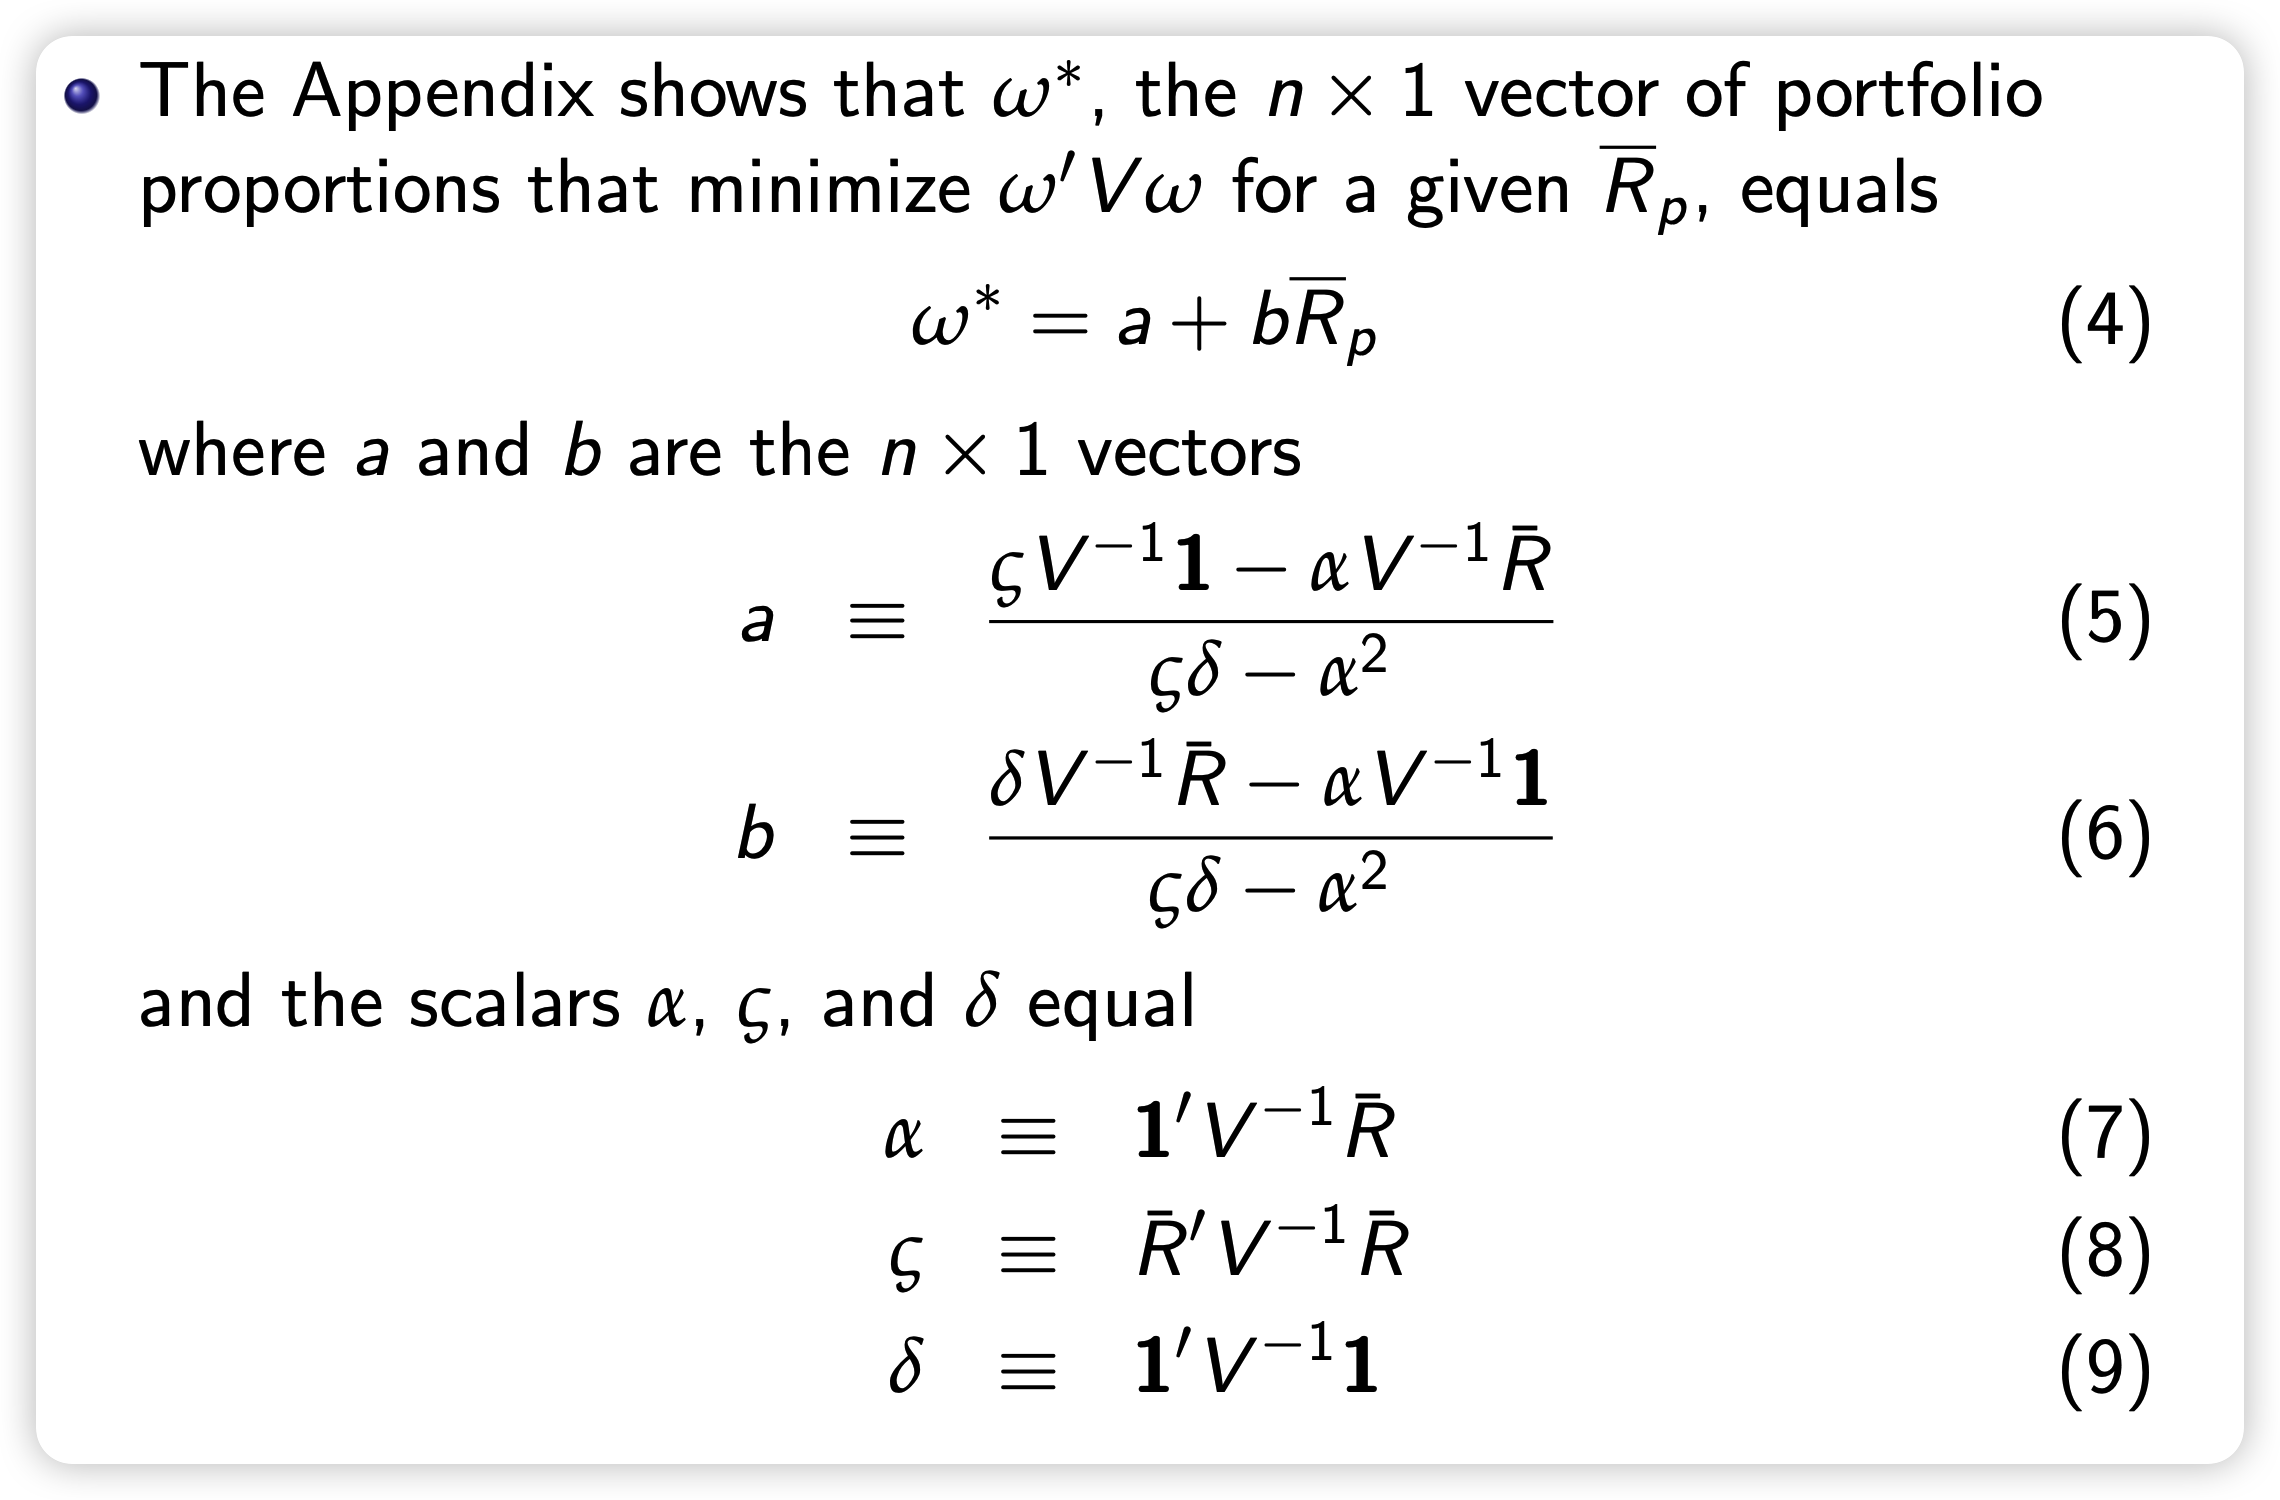

In [14]:
a = (ς * V_inversed @ One - α * V_inversed @ R̄ )/(ς*σ - α**2)
b = (σ * V_inversed @ R̄  - α * V_inversed @ One)/(ς*σ - α**2)

def ω_star():
    return a + b*R_mv()
print(ω_star()[0])


0.66646194


Question 4: Suppose an investor chooses a mean-variance efficient portfolio with a variance of 0.1. What is the expected return on this mean-variance efficient portfolio? State your answer to 4 decimal places, e.g., 1.0857.
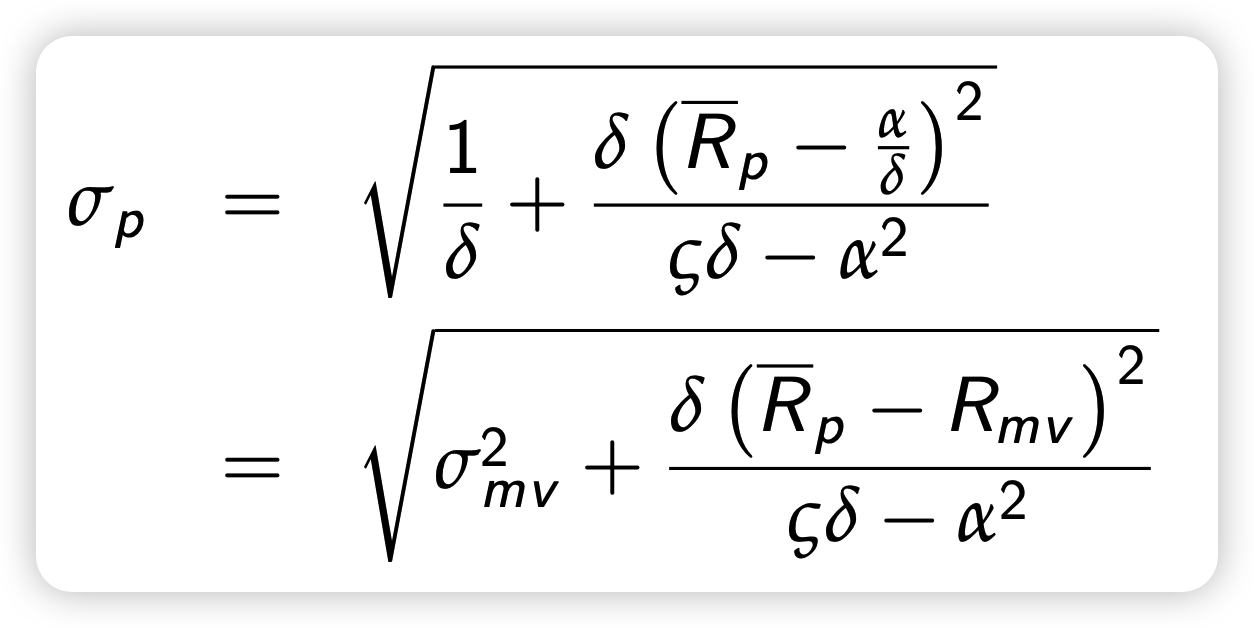

In [69]:
def Rp(σp_square):
    return ((((σp_square - pow(σ_mv(), 2))*(ζ*σ - pow(α, 2)))/σ))**0.5+R_mv()
print(Rp(0.1))

1.0799994


Question 5: Suppose, in addition to the two previously-specified risky assets, there is now a riskfree asset at pays the return Rf =1.03. Consider the tangency portfolio. What is the tangency portfolio’s proportion invested in asset 1, omega subscript 1 to the power of blank subscript T end exponent ? State your answer to 4 decimal places, e.g., 0.5839.
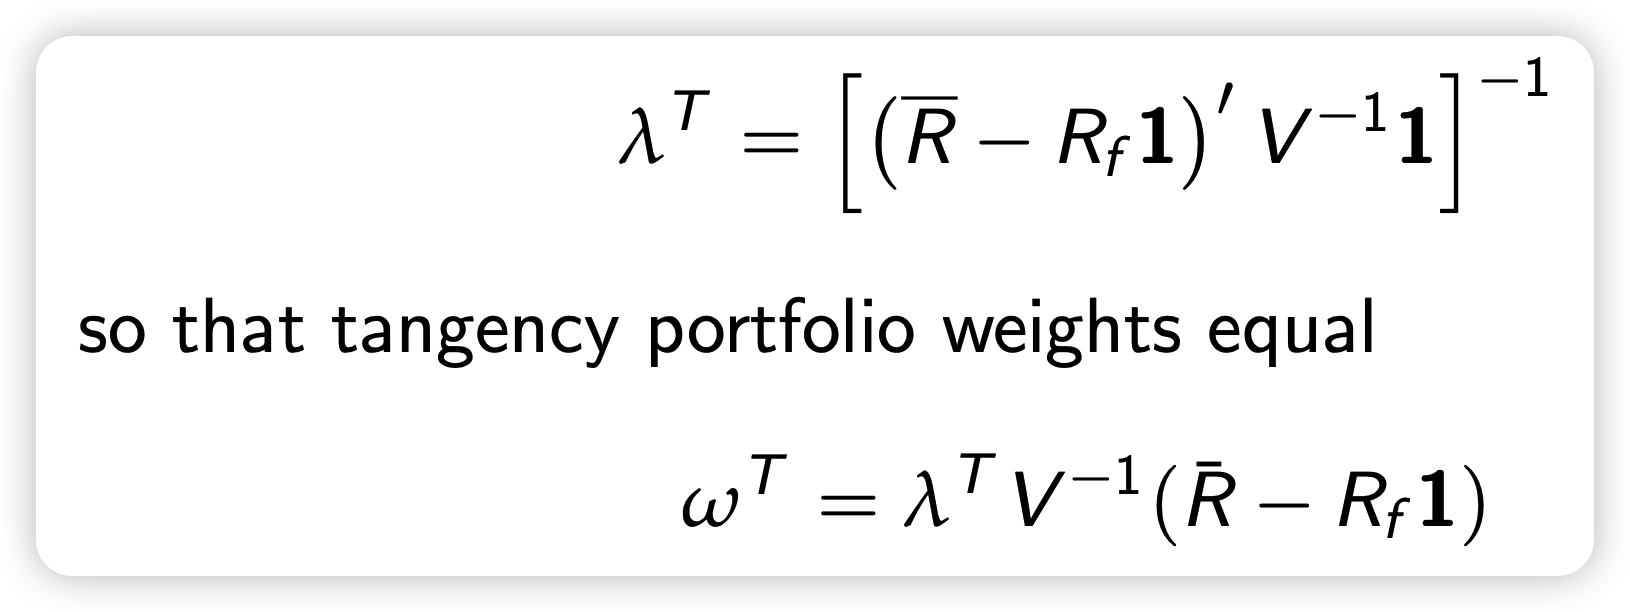

In [70]:
def ω_tangent(Rf):
    λ = (((R̄ - Rf*One) @ V_inversed @ One))**-1
    return λ * V_inversed @ (R̄ - Rf*One)
print(ω_tangent(1.03)[0])

0.25000003


Question 6: With this riskfree asset and the two risky assets, what is the Sharpe ratio obtained by investors who choose mean-variance efficient portfolios? State your answer to 4 decimal places, e.g., 0.5297 .
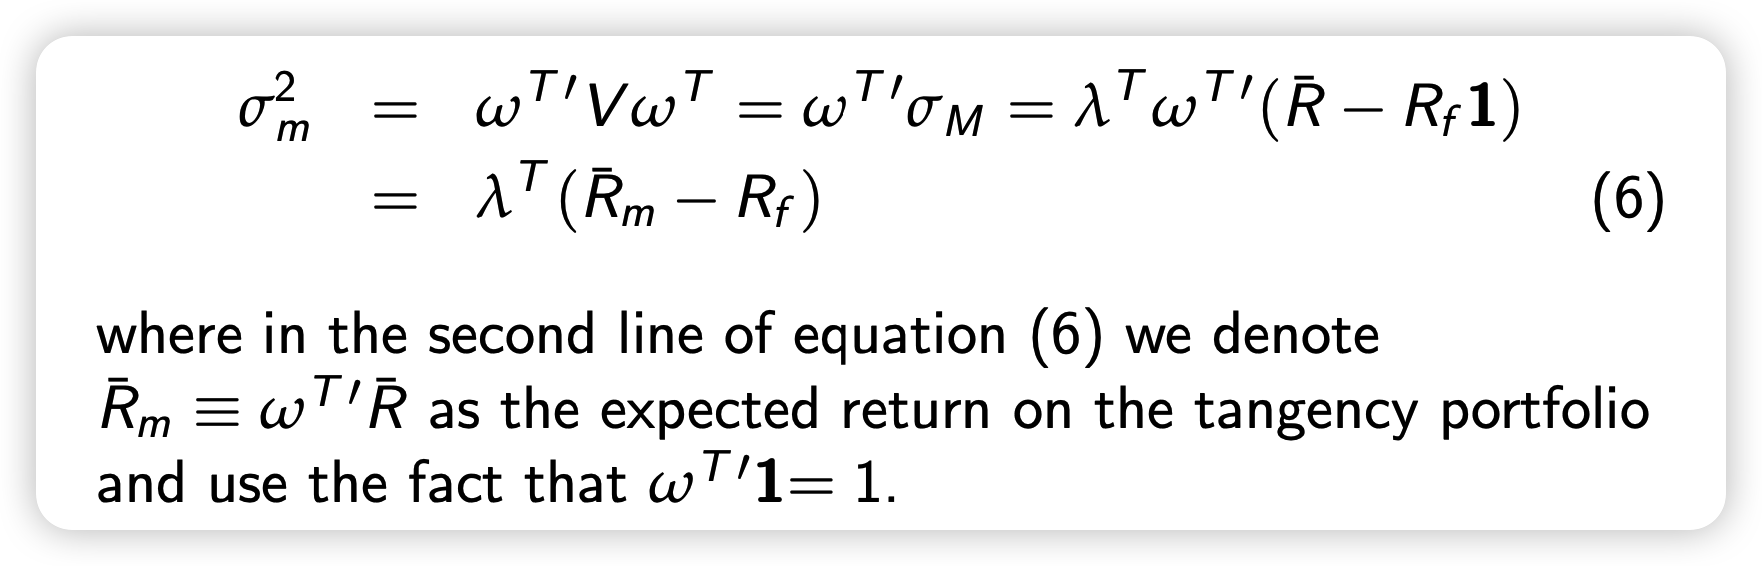
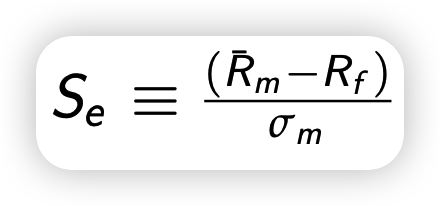

In [71]:
def R_market_bar(Rf):
    return ω_tangent(Rf) @ R̄
def σ_market_square(Rf):
    λ = (((R̄ - Rf*One) @ V_inversed @ One))**-1
    return λ*(R_market_bar(Rf) - Rf)
def Se(Rf):
    return (R_market_bar(Rf) - Rf)/pow(σ_market_square(Rf), 0.5)
print(Se(1.03))

0.15874527


Question 7: With the riskfree asset and two risky assets, suppose an investor chooses a mean-variance efficient portfolio with a variance of  0.12. What is the expected return on this mean-variance efficient portfolio? State your answer to 4 decimal places, e.g., 1.08346.

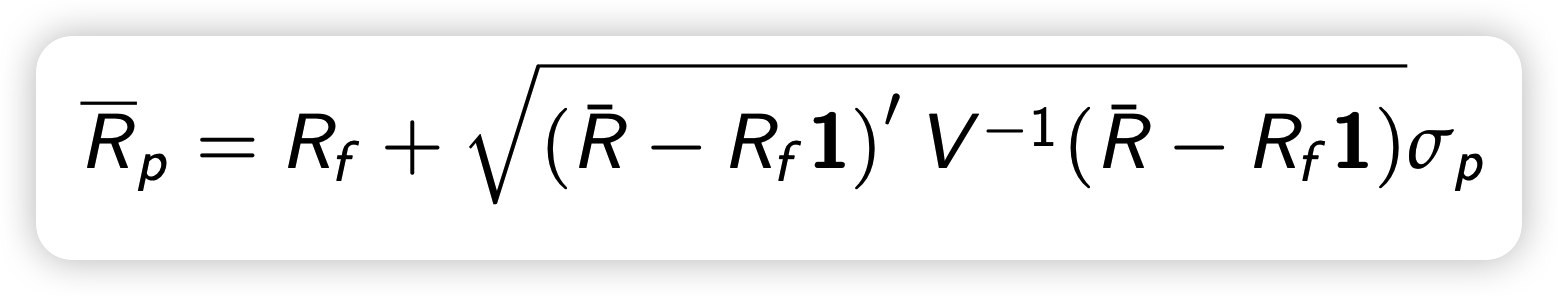



In [74]:
def Rp_with_riskfree(Rf, σp):
    return Rf + σp * ((R̄ - Rf*One).T @ V_inversed @ (R̄ - Rf*One))**0.5
print(Rp_with_riskfree(1.03, 0.12**0.5))

1.0849909
